# Step 1 - Reading the data

In [33]:
import cv2
import matplotlib.pyplot as plt

def read_and_display_images(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # OpenCV reads images in BGR format, convert it to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    return img_rgb

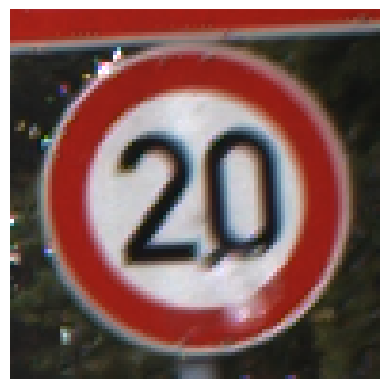

In [34]:
image_path = "./dataset/GTSRB/Final_Training/Images/00000/00000_00026.ppm"
sign_image = read_and_display_images(image_path)

# Applying filter

(-0.5, 96.5, 96.5, -0.5)

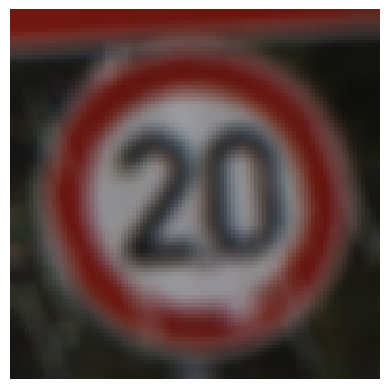

In [135]:
import albumentations as A
transform_image = A.Compose([
    A.RandomRain(p=1)
])
transformed = transform_image(image=sign_image)
image = transformed['image']
# Display the image
plt.imshow(image)
plt.axis('off')